In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
import seaborn as sns

<AxesSubplot:ylabel='Amount'>

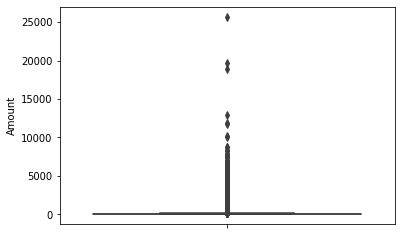

In [6]:
sns.boxplot(data = df, y ='Amount')

In [7]:
s = df['Amount'].values
l = []
for i in s :
    x_mean = np.mean(s)
    x_std = np.std(s)
    z = (i-x_mean)/x_std
    if z > 3 :
        i = None
    l.append(i)
        
df['Amount'] = l

In [8]:
df.isnull().sum()

Time         0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
Amount    4076
Class        0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
X = df.drop(columns = 'Class')
Y = df['Class']

In [16]:
X.shape

(280731, 30)

In [17]:
Y.shape

(280731,)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [20]:
model = LogisticRegression()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [25]:
model.fit(X_train, Y_train)

C:\Users\absha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = model.predict(X_test)

In [29]:
print(model.score(X_test, Y_test))

0.9988245142215969


In [30]:
print(metrics.confusion_matrix(Y_test, y_pred))

[[56012    14]
 [   52    69]]
